In [ ]:
# Install Kaggle API
!pip install kaggle

# Upload kaggle.json containing your Kaggle API credentials
from google.colab import files
files.upload()

# Create the Kaggle folder and move the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Adjust permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

# Unzip the dataset
!unzip new-york-city-airbnb-open-data.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 135MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Filling missing values
df['name'].fillna('No Name', inplace=True)
df['host_name'].fillna('No Host Name', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-7-8a1aa774c318>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('No Name', inplace=True)
<ipython-input-7-8a1aa774c318>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

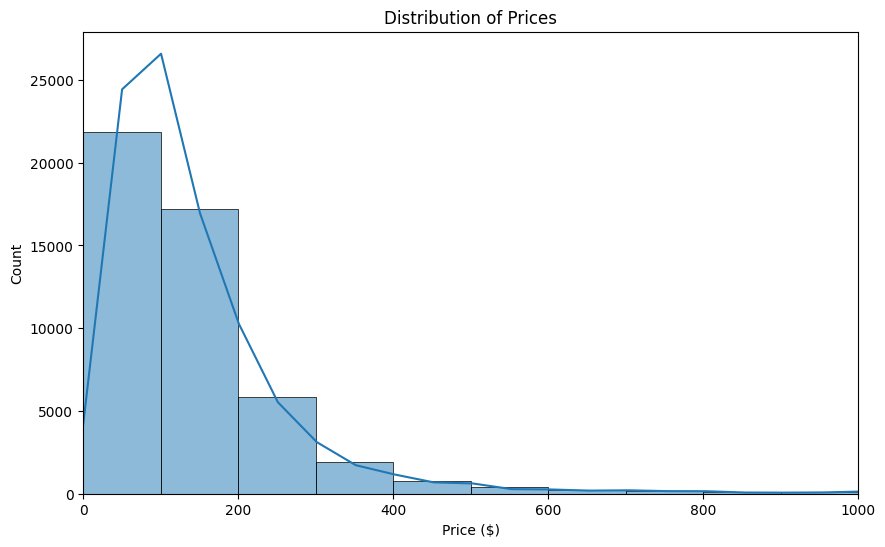

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.xlim(0, 1000)
plt.show()

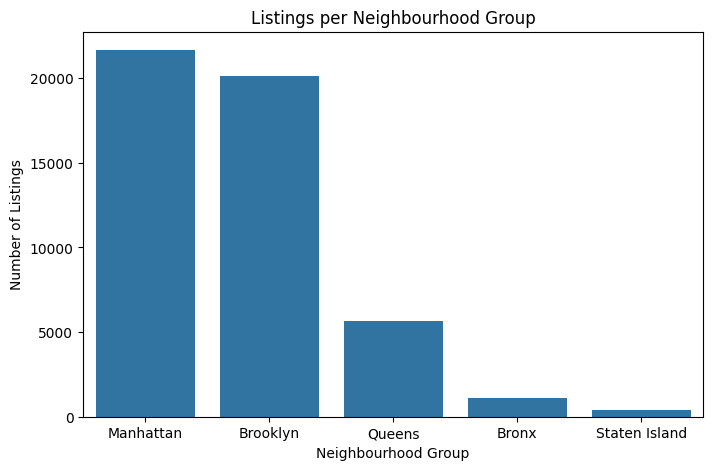

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

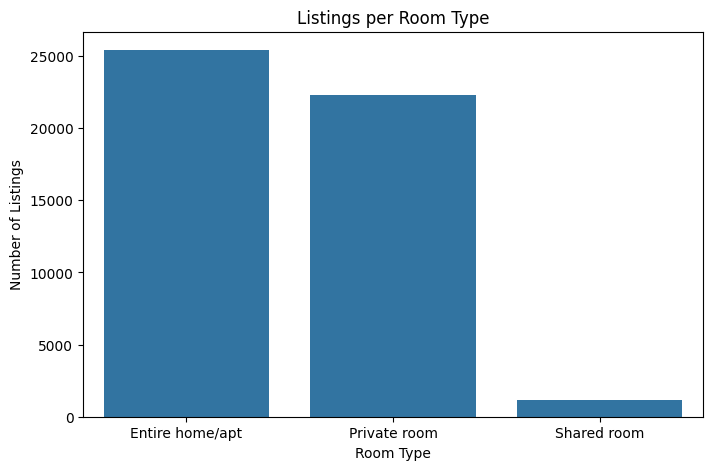

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Listings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

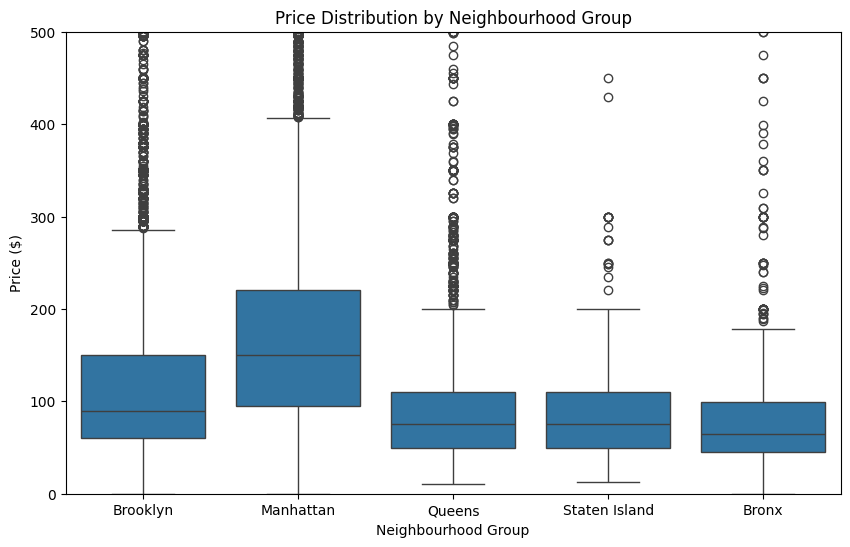

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.ylim(0, 500)
plt.show()

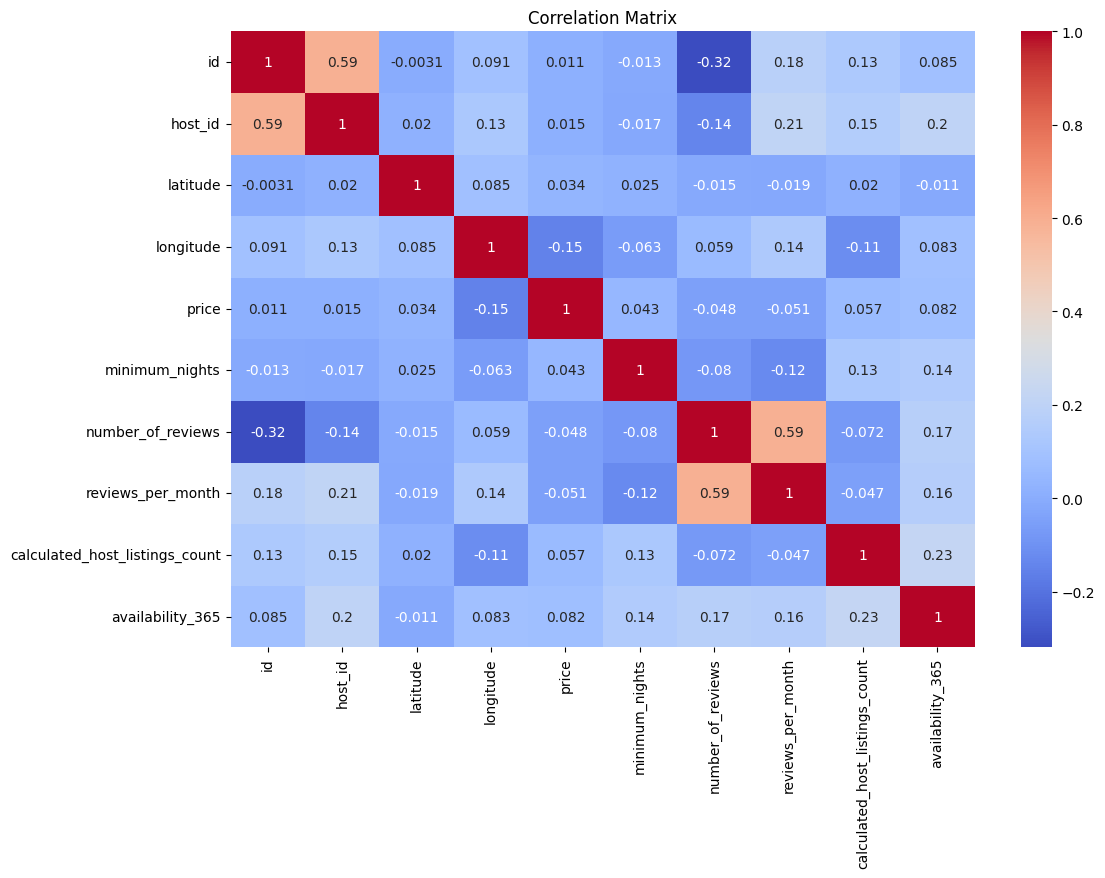

In [ ]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Calculate the 99th percentile
price_99 = df['price'].quantile(0.99)
print(f"99th percentile of price: ${price_99:.2f}")

# Cap the prices at the 99th percentile
df.loc[df['price'] > price_99, 'price'] = price_99

99th percentile of price: $799.00


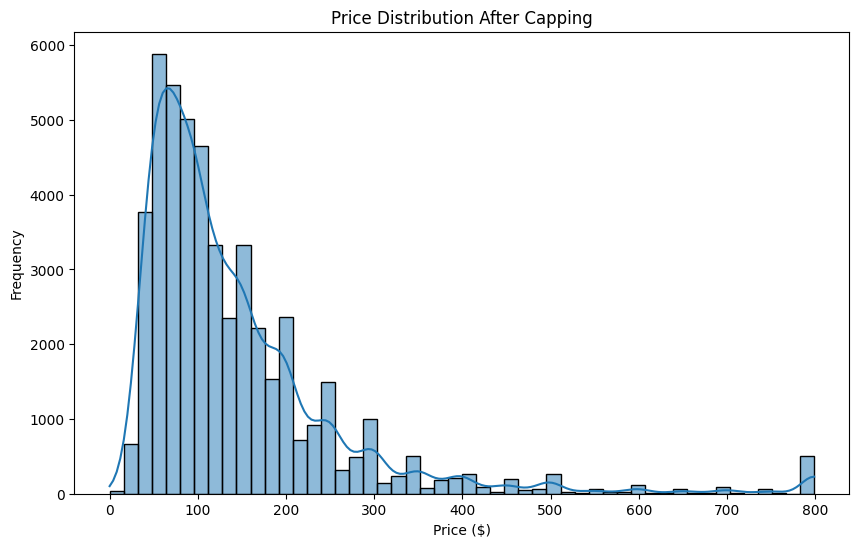

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution After Capping')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Fill missing 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Drop 'last_review' if it's not informative
df.drop(['last_review'], axis=1, inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


<ipython-input-16-4d8aa25f6095>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
df['price_log'] = np.log1p(df['price'])

In [ ]:
df['has_reviews'] = df['number_of_reviews'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [ ]:
neighbourhood_price = df.groupby('neighbourhood')['price'].mean()
df['neighbourhood_encoded'] = df['neighbourhood'].map(neighbourhood_price)
df.drop('neighbourhood', axis=1, inplace=True)

In [ ]:
import joblib
# After encoding 'neighbourhood' during training
neighbourhood_mapping = neighbourhood_price.to_dict()
joblib.dump(neighbourhood_mapping, 'neighbourhood_mapping.pkl')

['neighbourhood_mapping.pkl']

In [ ]:
scaler = StandardScaler()
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
X = df.drop(['id', 'name', 'host_id', 'host_name', 'price', 'price_log'], axis=1)
y = df['price_log']  # Using log-transformed price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Check dataset shapes
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (39116, 15), y_train shape: (39116,)
X_test shape: (9779, 15), y_test shape: (9779,)


In [ ]:
# Assuming 'X_train' is your training DataFrame
feature_columns = X_train.columns.tolist()

# Save the feature columns
import joblib
joblib.dump(feature_columns, 'feature_columns.pkl')

# Download 'feature_columns.pkl' to include in your Flask app
from google.colab import files
files.download('feature_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Baseline prediction using mean
baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Evaluate baseline model
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)
baseline_r2 = r2_score(y_test, baseline_pred)

print('Baseline Model Performance:')
print(f'MAE: {baseline_mae:.4f}')
print(f'RMSE: {baseline_rmse:.4f}')
print(f'R²: {baseline_r2:.4f}')

Baseline Model Performance:
MAE: 0.5421
RMSE: 0.6728
R²: -0.0003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test)

# Performance metrics
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

print('Linear Regression Performance:')
print(f'MAE: {lr_mae:.4f}')
print(f'RMSE: {lr_rmse:.4f}')
print(f'R²: {lr_r2:.4f}')

Linear Regression Performance:
MAE: 0.3304
RMSE: 0.4429
R²: 0.5664


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Initialize and train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print('Random Forest Performance:')
print(f'MAE: {rf_mae:.4f}')
print(f'RMSE: {rf_rmse:.4f}')
print(f'R²: {rf_r2:.4f}')

Random Forest Performance:
MAE: 0.2991
RMSE: 0.4088
R²: 0.6307


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Initialize and train
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_gb = gb_model.predict(X_test)

# Performance metrics
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_r2 = r2_score(y_test, y_pred_gb)

print('Gradient Boosting Performance:')
print(f'MAE: {gb_mae:.4f}')
print(f'RMSE: {gb_rmse:.4f}')
print(f'R²: {gb_r2:.4f}')

Gradient Boosting Performance:
MAE: 0.3097
RMSE: 0.4190
R²: 0.6121


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Initialize and train
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Performance metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print('XGBoost Performance:')
print(f'MAE: {xgb_mae:.4f}')
print(f'RMSE: {xgb_rmse:.4f}')
print(f'R²: {xgb_r2:.4f}')

XGBoost Performance:
MAE: 0.2980
RMSE: 0.4042
R²: 0.6390


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Compile results
results = pd.DataFrame({
    'Model': ['Baseline', 'Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MAE': [baseline_mae, lr_mae, rf_mae, gb_mae, xgb_mae],
    'RMSE': [baseline_rmse, lr_rmse, rf_rmse, gb_rmse, xgb_rmse],
    'R²': [baseline_r2, lr_r2, rf_r2, gb_r2, xgb_r2]
})

print(results)

               Model       MAE      RMSE        R²
0           Baseline  0.542057  0.672770 -0.000322
1  Linear Regression  0.330372  0.442922  0.566428
2      Random Forest  0.299088  0.408773  0.630708
3  Gradient Boosting  0.309747  0.418958  0.612076
4            XGBoost  0.298036  0.404153  0.639008


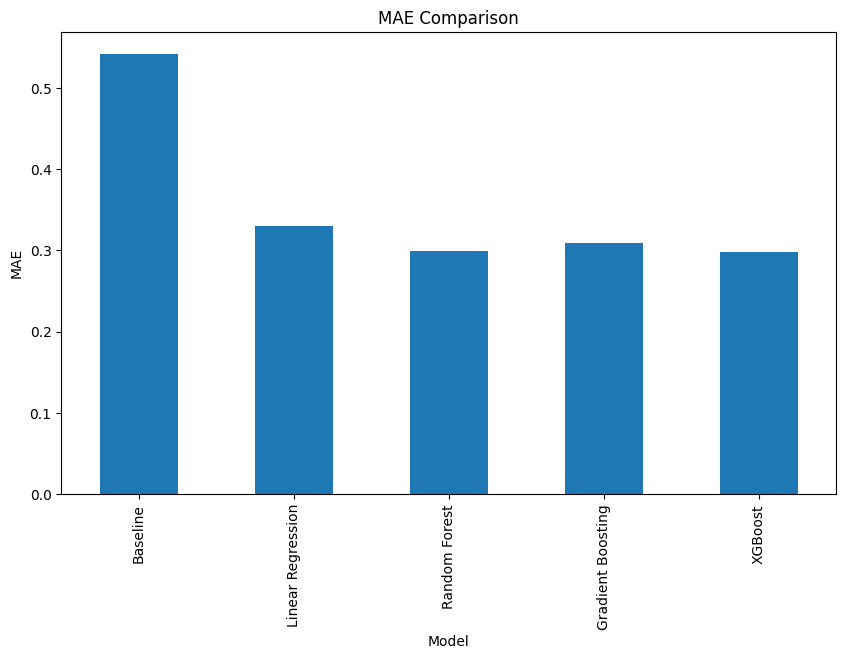

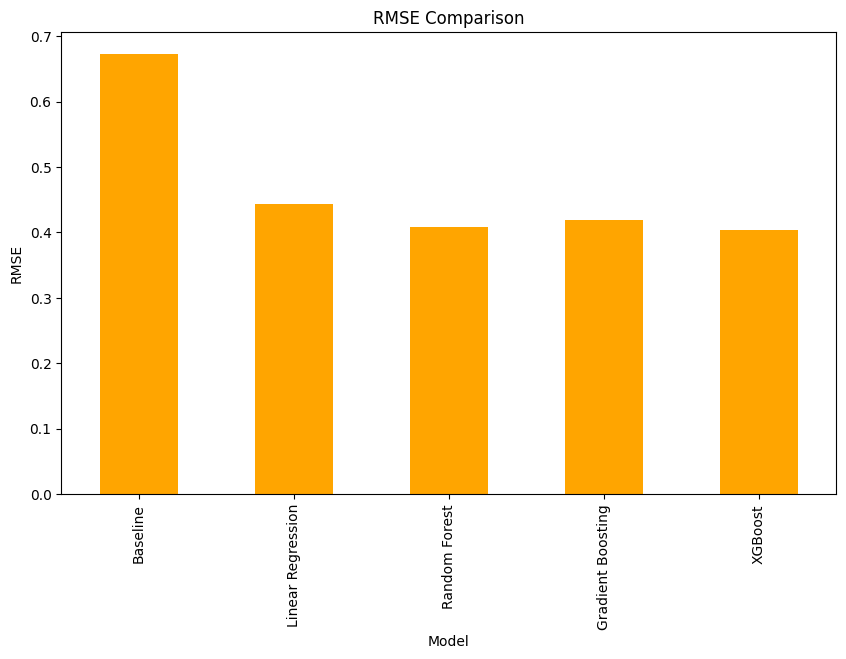

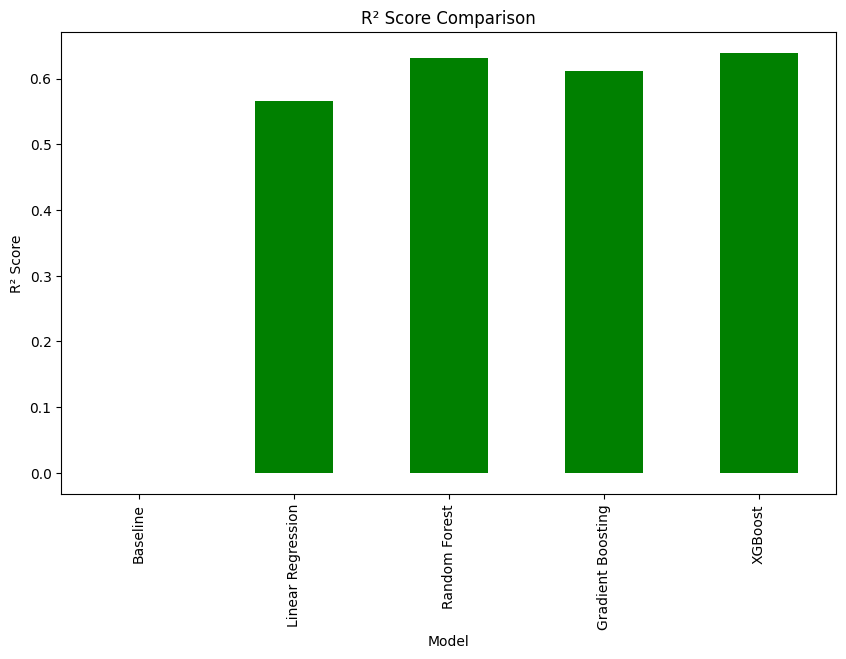

In [ ]:
# Set index for easier plotting
results.set_index('Model', inplace=True)

# Plotting MAE
results['MAE'].plot(kind='bar', figsize=(10,6), title='MAE Comparison')
plt.ylabel('MAE')
plt.show()

# Plotting RMSE
results['RMSE'].plot(kind='bar', figsize=(10,6), title='RMSE Comparison', color='orange')
plt.ylabel('RMSE')
plt.show()

# Plotting R²
results['R²'].plot(kind='bar', figsize=(10,6), title='R² Score Comparison', color='green')
plt.ylabel('R² Score')
plt.show()

In [ ]:
# Retrieve feature importances
feature_importances = xgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

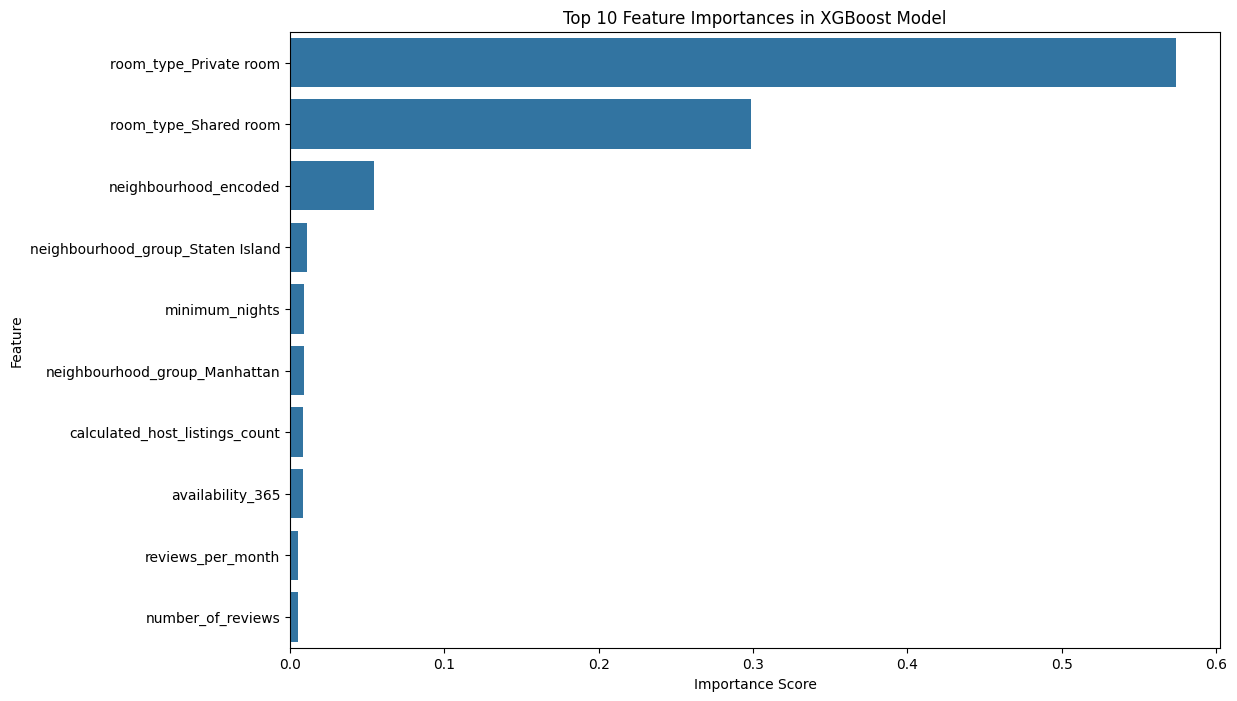

In [ ]:
# Visualize top 10 features
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances in XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Average MAE from Cross-Validation: {-np.mean(cv_scores):.4f}')

Average MAE from Cross-Validation: 0.3059


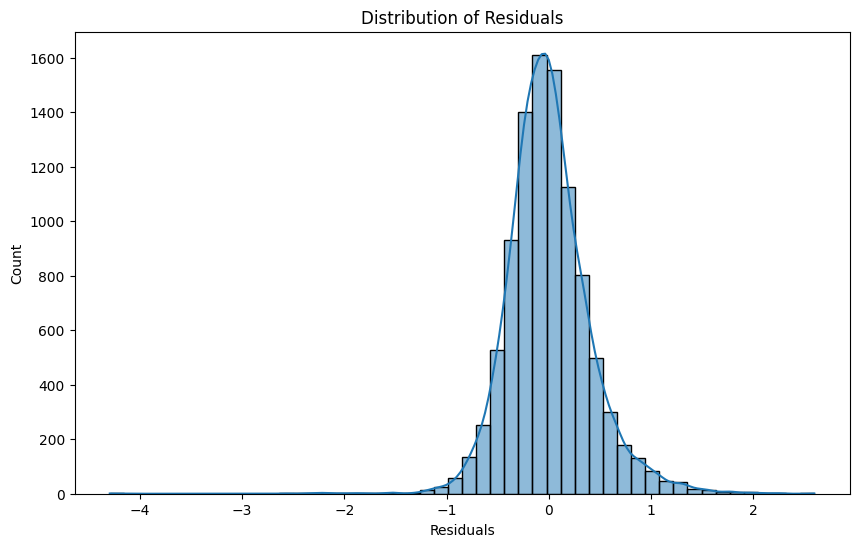

In [ ]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

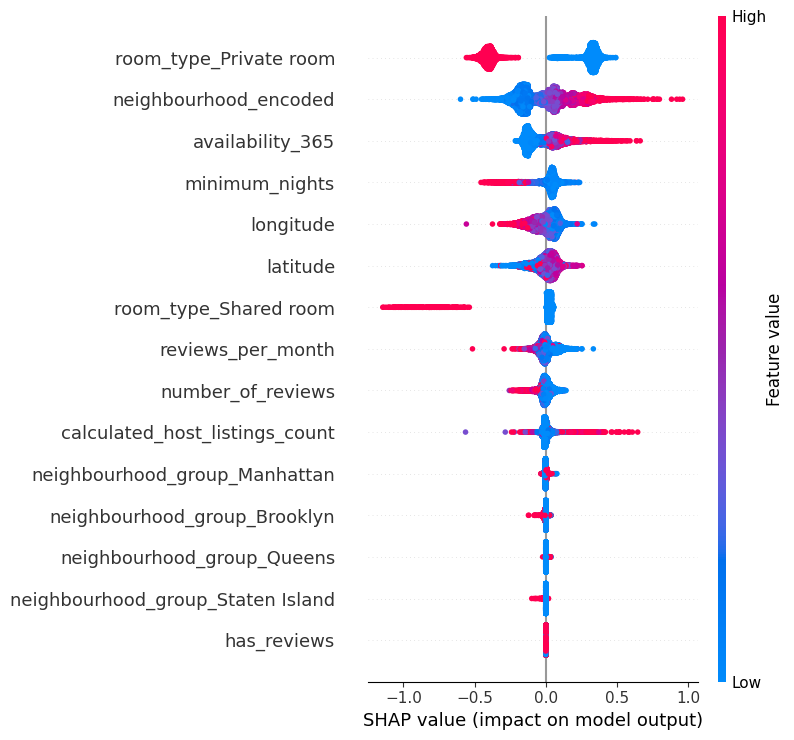

In [ ]:
import shap

# Initialize the explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

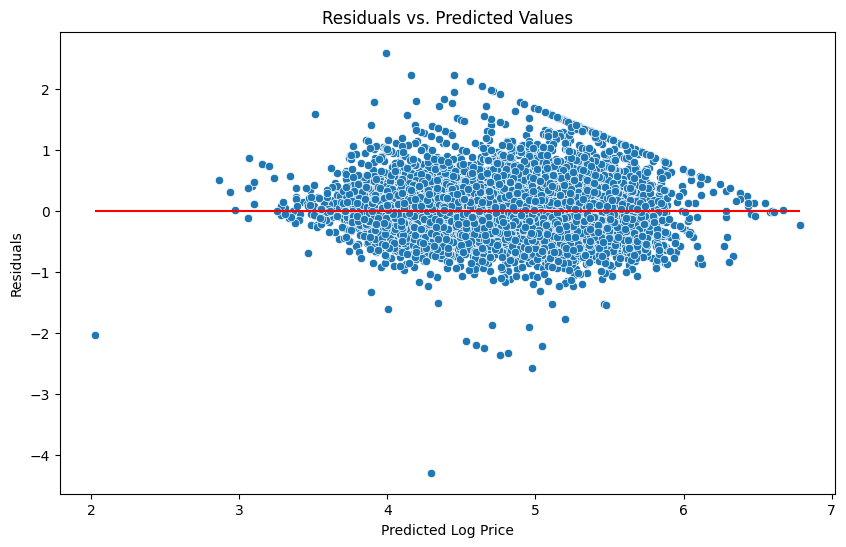

In [ ]:
# Calculating residuals
residuals = y_test - y_pred_xgb

# Plotting residuals
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.hlines(y=0, xmin=y_pred_xgb.min(), xmax=y_pred_xgb.max(), colors='r')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

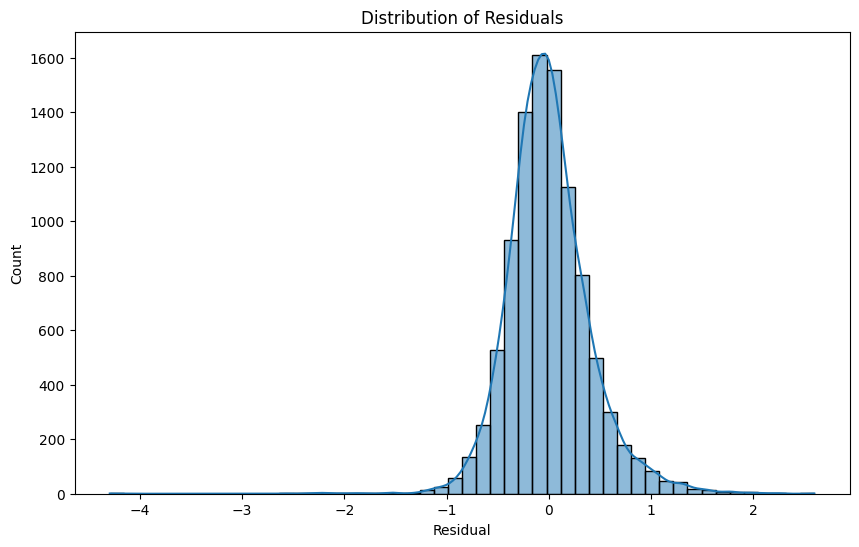

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'
)
average_mae = -np.mean(cv_scores)
print(f'Average MAE from 5-Fold Cross-Validation: {average_mae:.4f}')

Average MAE from 5-Fold Cross-Validation: 0.3059


In [ ]:
# Top 10 features
importance_df.head(10)

,Feature,Importance
12,room_type_Private room,0.573839
13,room_type_Shared room,0.298978
14,neighbourhood_encoded,0.054598
11,neighbourhood_group_Staten Island,0.011306
2,minimum_nights,0.009361
9,neighbourhood_group_Manhattan,0.008893
5,calculated_host_listings_count,0.008687
6,availability_365,0.008458
4,reviews_per_month,0.005304
3,number_of_reviews,0.005238


In [ ]:
# Serialize the XGBoost model using joblib
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
# Example: Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from google.colab import files

# Download the model
files.download('xgb_model.pkl')

# Download the scaler
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>